<center><h1>E-Signing of Loan Based on Financial History</h1></center>

**<h4>ESignature:</h4>**
<br>
<p style="text-indent:5em">Electronic signatures aren’t exactly a novelty. They have been around since the American Civil War, during which contracts were signed through Morse. In a modern setting, an e-Sign refers to a unique, digitised, encrypted personal identifier. This is, in essence, different from the ‘wet’ signatures created by hand. The e-Sign is meant to complete transactions, loops, and agreements electronically.</p>

<p style="text-indent:5em">In India, the e-Sign has been granted legal status by amendments to various laws, namely the Information Technology Act, Indian Evidence Act and the Negotiable Instruments Act. Early adopters in the financial sector have started using e-Sign to get customers to sign loan and card applications, and loan agreements.</p>



### Importing the Library

In [1]:
#importing library for reading, writing and perform basic operations
import pandas as pd
import numpy as np

#Importing library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing the library for evaluating the model
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: ignored

### Reading the Data

In [5]:
df=pd.read_csv("/content/drive/MyDrive/30 projects/E-signing of loan/financial_data.csv")
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


### Exploring the Data

In [6]:
#Finding the count of each class of dependent variable
print(sum(df["e_signed"]==1))
print(sum(df["e_signed"]==0))

9639
8269


In [7]:
#Checking for percentage of missing data in each column
percent_missing = df.isnull().sum() * 100 / len(df)                
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})          

missing_value_df

,percent_missing
entry_id,0.0
age,0.0
pay_schedule,0.0
home_owner,0.0
income,0.0
months_employed,0.0
years_employed,0.0
current_address_year,0.0
personal_account_m,0.0
personal_account_y,0.0


<p style="text-indent:5em">We see that the data is not highly imbalanced since the ratio between the count of two classes of dependent variable is not so high.

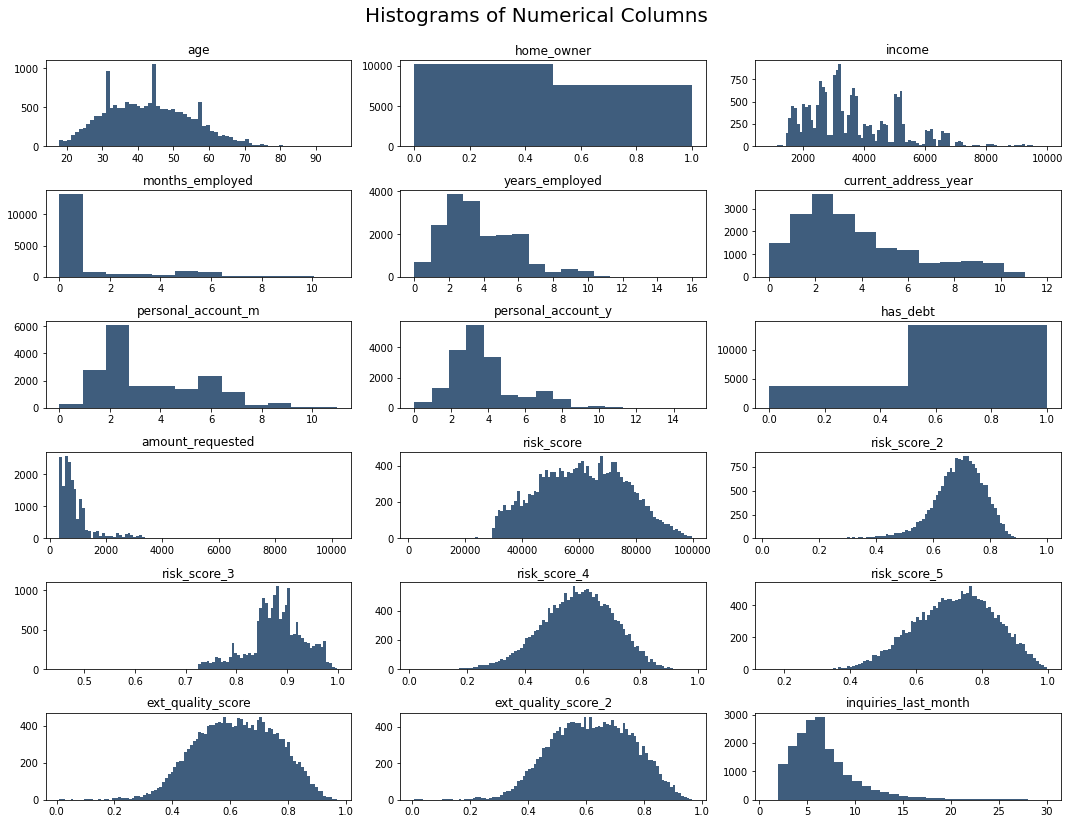

In [8]:
#Dropping the unnecessary columns
dataset2 = df.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])

fig = plt.figure(figsize=(15, 12))

plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

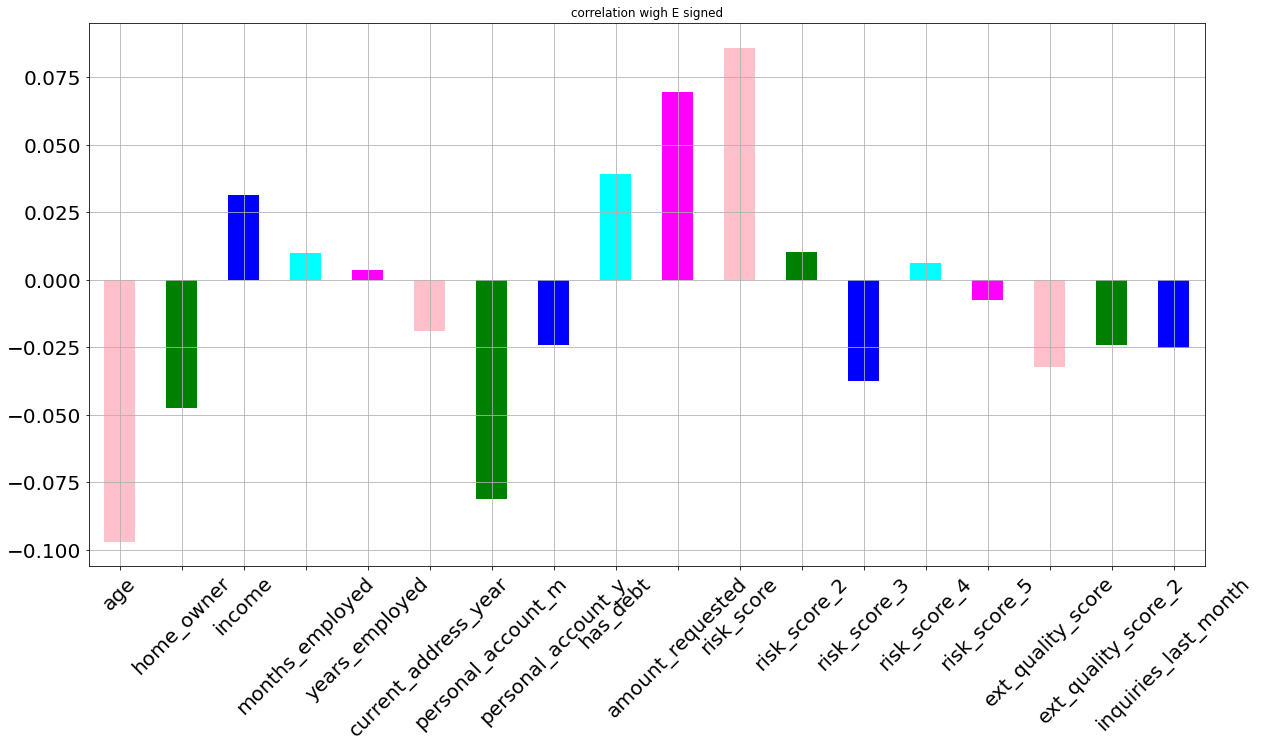

In [9]:
#Correlation of independent variable with dependent variable

dataset2.corrwith(df.e_signed).plot.bar(figsize=(20,10),title="correlation wigh E signed",
                                             fontsize=20,rot=45,grid= True,color=['pink','green',
                                                                                  'blue','cyan','magenta'])

In [10]:
#Initiatizig into new variable and creating the dummy variable for categorical data
data=df
dummy=pd.get_dummies(data["pay_schedule"])


In [11]:
dummy

,bi-weekly,monthly,semi-monthly,weekly
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
17903,0,1,0,0
17904,1,0,0,0
17905,0,0,0,1
17906,1,0,0,0


In [12]:
dummy=dummy.drop(labels=["bi-weekly"],axis=1)

In [13]:

data=data.drop(["pay_schedule"],axis=1)

In [14]:

data=pd.concat([data,dummy],axis=1)

In [15]:

data.shape

(17908, 23)

In [16]:
# Seperating the data into dependent and independent varioable. Response contains the esigned column which needs to be computed
#from the dataset
response = data["e_signed"]
dataset = data.drop(columns = ["e_signed", "entry_id"])

In [17]:
#Transforming the data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()

In [18]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [19]:
#Fitting and transforming our data
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [20]:
X_train.shape

(14326, 21)

#### Building ANN Using Keras

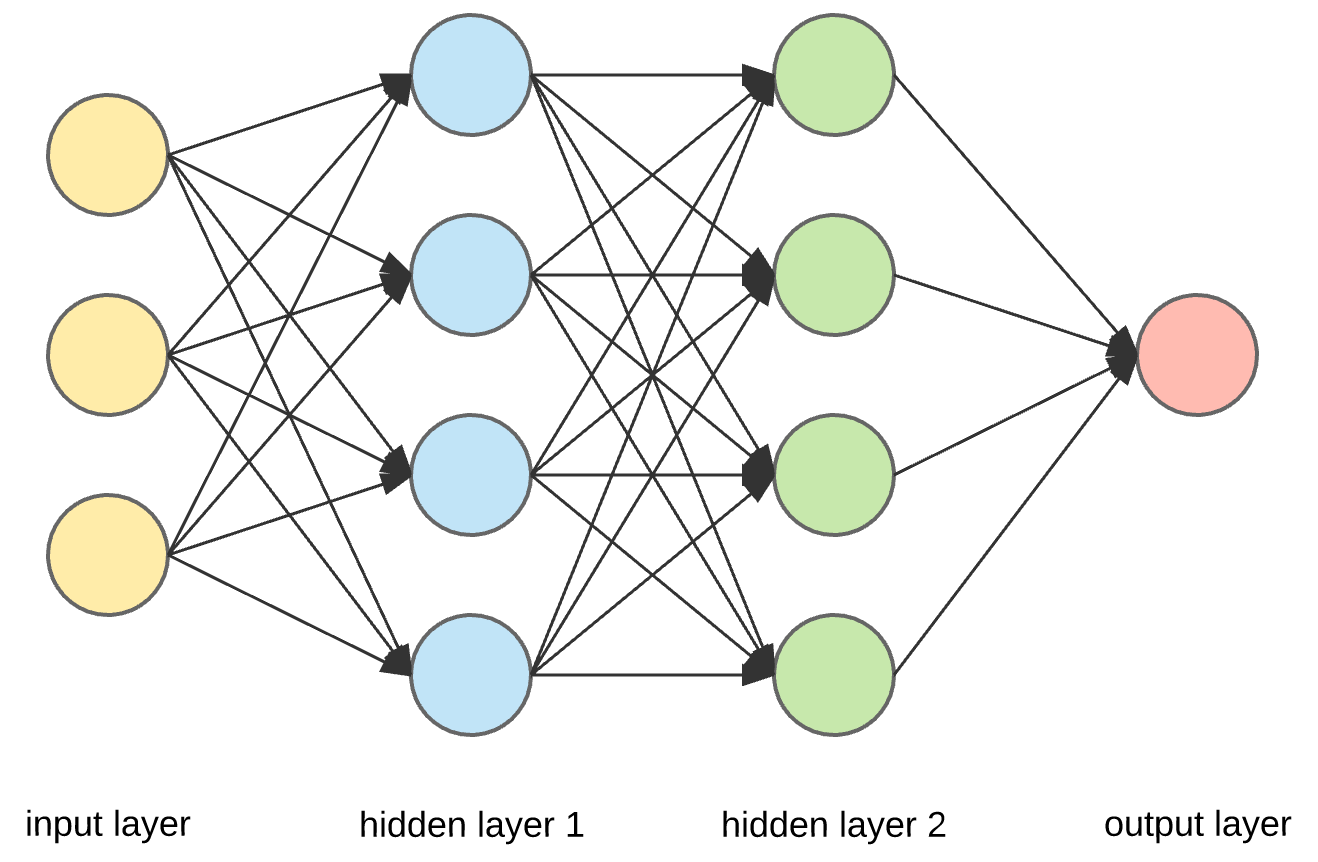

In [27]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


classifier = Sequential()

In [22]:
#Adding the layers in ANN
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))


classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))


classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
1433/1433 [==============================] - 3s 2ms/step - loss: 0.6757 - accuracy: 0.5739
Epoch 2/100
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6656 - accuracy: 0.5902
Epoch 3/100
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6618 - accuracy: 0.5967
Epoch 4/100
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6570 - accuracy: 0.6025
Epoch 5/100
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6525 - accuracy: 0.6094
Epoch 6/100
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6497 - accuracy: 0.6128
Epoch 7/100
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6466 - accuracy: 0.6166
Epoch 8/100
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6452 - accuracy: 0.6186
Epoch 9/100
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6428 - accuracy: 0.6227
Epoch 10/100
1433/1433 [==============================] - 2s 2ms/step - l

In [24]:
#Predict functioon the test data using the model
pred=classifier.predict(X_test)

In [25]:

y_pred = (pred > 0.5)

In [26]:
accuracy_score(y_pred,y_test)

0.6099944165270799

## Other Machine Learning Model

#### Feature Engineering

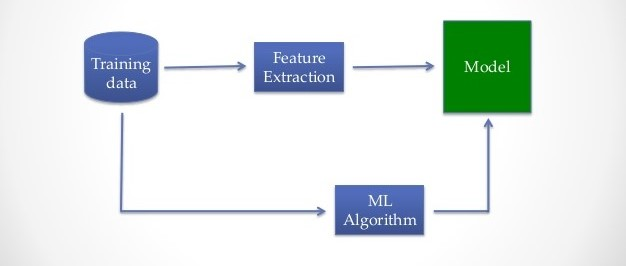
    


##### AGE

We will group our age data as follows:
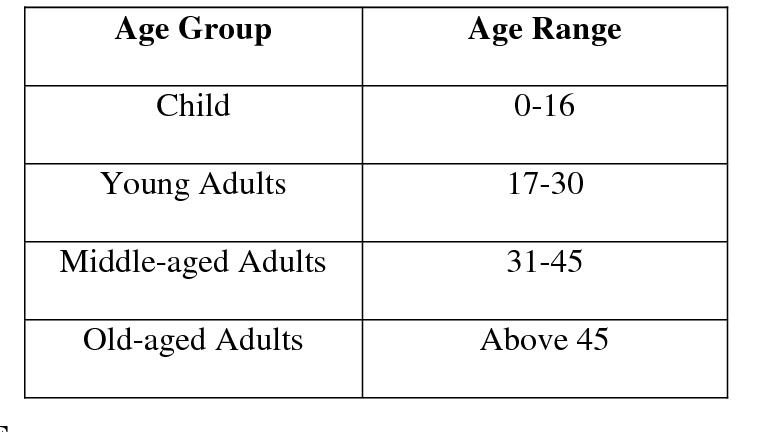

In [28]:
#Initializing the Empty List
AGE=[]

for i in range(len(df)):
    if(df["age"][i]<=45):
        AGE.append("ADULT")
        
    else:
        AGE.append("SENIOR")

#### Months Employed and Personal Account

We will calculate months employed as follows:
<br>
<p style="text-indent:5em">month employed=month employed+ years employed*12</p>
    <p style="text-indent:5em">account_m=account_m+account_y*12</p>


In [29]:
EMPLOYED=[]
for i in range(len(df)):
    x=df["months_employed"][i]+df["years_employed"][i]*12
    EMPLOYED.append(x)

In [30]:
PA=[]
for i in range(len(df)):
    x=df["personal_account_m"][i]+df["personal_account_y"][i]*12
    PA.append(x)

In [35]:
avg_risk=[]
for i in range(len(df)):
    x=(df["risk_score_2"][i]+df["risk_score_3"][i]+df["risk_score_4"][i]+df["risk_score_5"][i])/4
    avg_risk.append(x)

In [36]:
ext_quality=[]
for i in range(len(df)):
    x=(df["ext_quality_score_2"][i]+df["ext_quality_score"][i])/2
    ext_quality.append(x)

#### Merging all the features into Single Dataframe

<p style="text-indent:5em">


In [37]:
#Converting all lists into DataFrame
AGE=pd.DataFrame(AGE)
EMPLOYED=pd.DataFrame(EMPLOYED)
PA=pd.DataFrame(PA)
avg_risk=pd.DataFrame(avg_risk)
ext_quality=pd.DataFrame(ext_quality)

#Concatng all the features
featured=pd.concat([AGE,EMPLOYED,PA,avg_risk,ext_quality],axis=1)

In [38]:
featured.columns=["AGE","EMPLOYED","PA","RISK","QUALITY"]

In [39]:
featured.head()

,AGE,EMPLOYED,PA,RISK,QUALITY
0,ADULT,36,30,0.661151,0.480918
1,SENIOR,72,86,0.789841,0.680720
2,ADULT,6,19,0.691712,0.531712
3,ADULT,72,86,0.793179,0.692552
4,ADULT,60,98,0.688483,0.744634


In [40]:
#Creating Dummy Variable
dummy1=pd.get_dummies(featured["AGE"])
dummy1.head()

,ADULT,SENIOR
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [41]:
#Dropping the AGE Variable since dummy variable is created
featured=featured.drop(["AGE"],axis=1)

#Concating the data and dummy variable
featured=pd.concat([featured,dummy1],axis=1)
featured.head()

,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,36,30,0.661151,0.480918,1,0
1,72,86,0.789841,0.680720,0,1
2,6,19,0.691712,0.531712,1,0
3,72,86,0.793179,0.692552,1,0
4,60,98,0.688483,0.744634,1,0


#### Classifying the Data into dependent and independent Variable

In [42]:
#Dependent Variable
dep="e_signed"

#Selelcting all the column as independent variable
ind=df.columns.tolist()

In [43]:
ind

['entry_id',
 'age',
 'pay_schedule',
 'home_owner',
 'income',
 'months_employed',
 'years_employed',
 'current_address_year',
 'personal_account_m',
 'personal_account_y',
 'has_debt',
 'amount_requested',
 'risk_score',
 'risk_score_2',
 'risk_score_3',
 'risk_score_4',
 'risk_score_5',
 'ext_quality_score',
 'ext_quality_score_2',
 'inquiries_last_month',
 'e_signed']

In [44]:
#Removing the dependent variable from independent
ind.remove(dep)
ind.remove("entry_id")

In [45]:
#Selecting the Data
X=df[ind]
Y=df[dep]

In [46]:
#Concating the featured data and unfeatured data
X=pd.concat([X,featured],axis=1)
X.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,36,30,0.661151,0.480918,1,0
1,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,72,86,0.789841,0.680720,0,1
2,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,6,19,0.691712,0.531712,1,0
3,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,72,86,0.793179,0.692552,1,0
4,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,60,98,0.688483,0.744634,1,0


In [47]:
#Dropping the unnecessay data from our dataset
X=X.drop(labels=["age","months_employed","years_employed","personal_account_m","personal_account_y","risk_score_2","risk_score_3"
                ,"risk_score_4","risk_score_5","ext_quality_score_2","ext_quality_score"],axis=1)

In [48]:
X.head()

,pay_schedule,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,bi-weekly,1,3135,3,1,550,36200,10,36,30,0.661151,0.480918,1,0
1,weekly,0,3180,3,1,600,30150,9,72,86,0.789841,0.680720,0,1
2,weekly,0,1540,0,1,450,34550,7,6,19,0.691712,0.531712,1,0
3,bi-weekly,0,5230,1,1,700,42150,8,72,86,0.793179,0.692552,1,0
4,semi-monthly,0,3590,2,1,1100,53850,12,60,98,0.688483,0.744634,1,0


In [49]:
#Creating Dummy Variable
dummy2=pd.get_dummies(X["pay_schedule"])

#Removing the trap
dummy2=dummy2.drop(labels=["bi-weekly"],axis=1)
dummy2.head()

,monthly,semi-monthly,weekly
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,1,0


In [50]:
#Dropping the pay_schedule since dummy variable is created
X=X.drop(labels=["pay_schedule"],axis=1)

#Concating the data and dummy variable
X=pd.concat([X,dummy2],axis=1)
X.head()

,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR,monthly,semi-monthly,weekly
0,1,3135,3,1,550,36200,10,36,30,0.661151,0.480918,1,0,0,0,0
1,0,3180,3,1,600,30150,9,72,86,0.789841,0.680720,0,1,0,0,1
2,0,1540,0,1,450,34550,7,6,19,0.691712,0.531712,1,0,0,0,1
3,0,5230,1,1,700,42150,8,72,86,0.793179,0.692552,1,0,0,0,0
4,0,3590,2,1,1100,53850,12,60,98,0.688483,0.744634,1,0,0,1,0


#### Data Transformation and Model Building

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
scale=StandardScaler()
#Transforming the data
X=scale.fit_transform(X)

##### Splitting the Data

In [53]:
#from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=0)

## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [57]:
#Initializing the object
model=RandomForestClassifier()

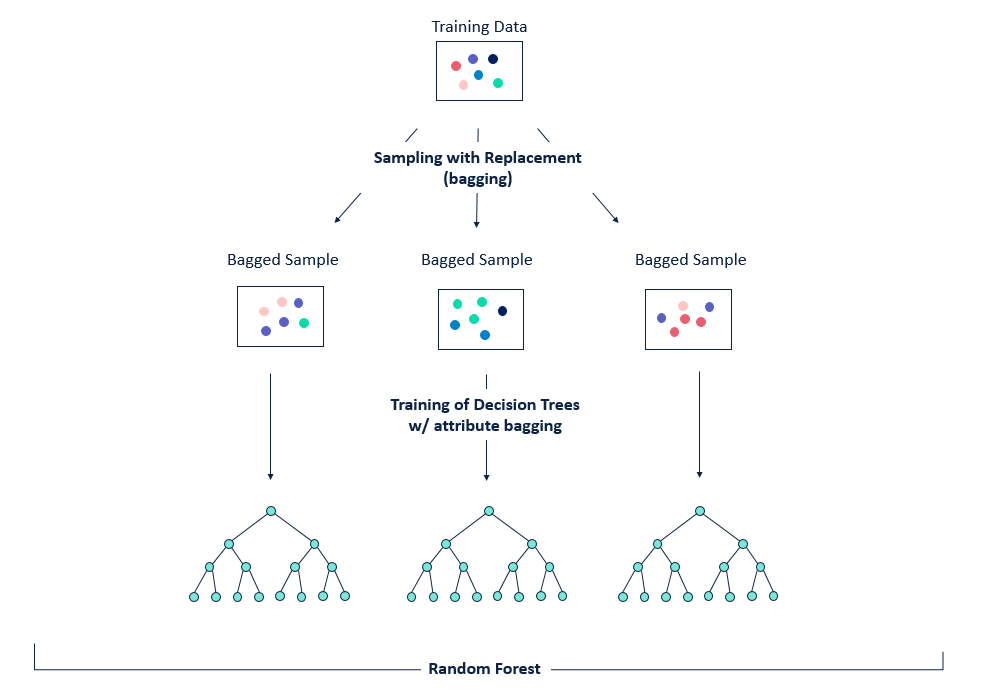<div>


In [58]:
#Fitting the model
model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
#Predictions on test data
pred=model.predict(xtest)

In [60]:
accuracy_score(ytest,pred)

0.6184945275854367

### Gradient Boosting

+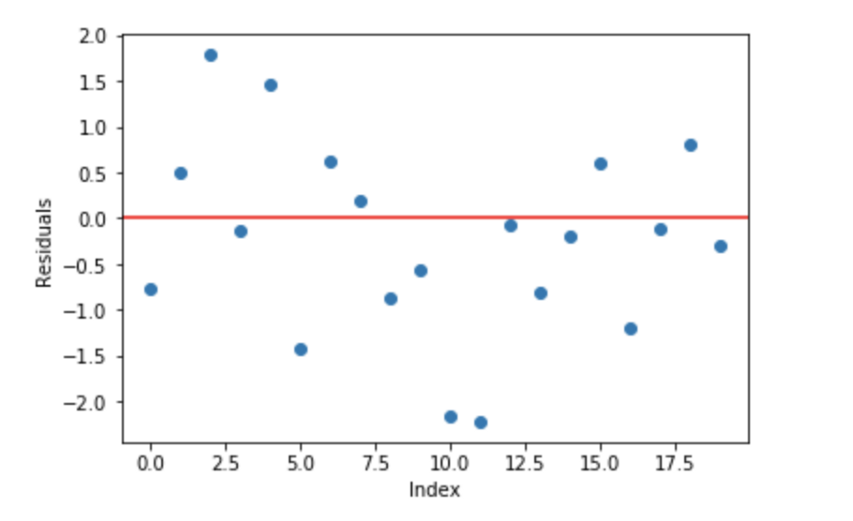


<a href="https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d">Read More</a>

In [61]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(xtrain, ytrain)

In [62]:
print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(xtrain, ytrain)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(xtest, ytest)))

Learning rate:  1
Accuracy score (training): 0.622
Accuracy score (validation): 0.583


### XgBoost

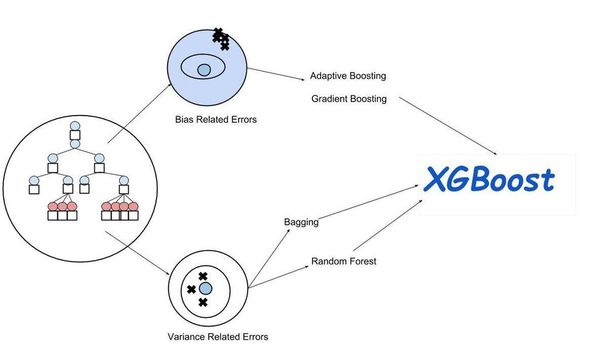

In [63]:
#Implementing xgboost
from xgboost import XGBClassifier

In [64]:
#Initializing the model
xgb_clf = XGBClassifier()
xgb_clf.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [65]:
score = xgb_clf.score(xtest, ytest)
print(score)

0.6278758096939915


#### Support Vector Machine

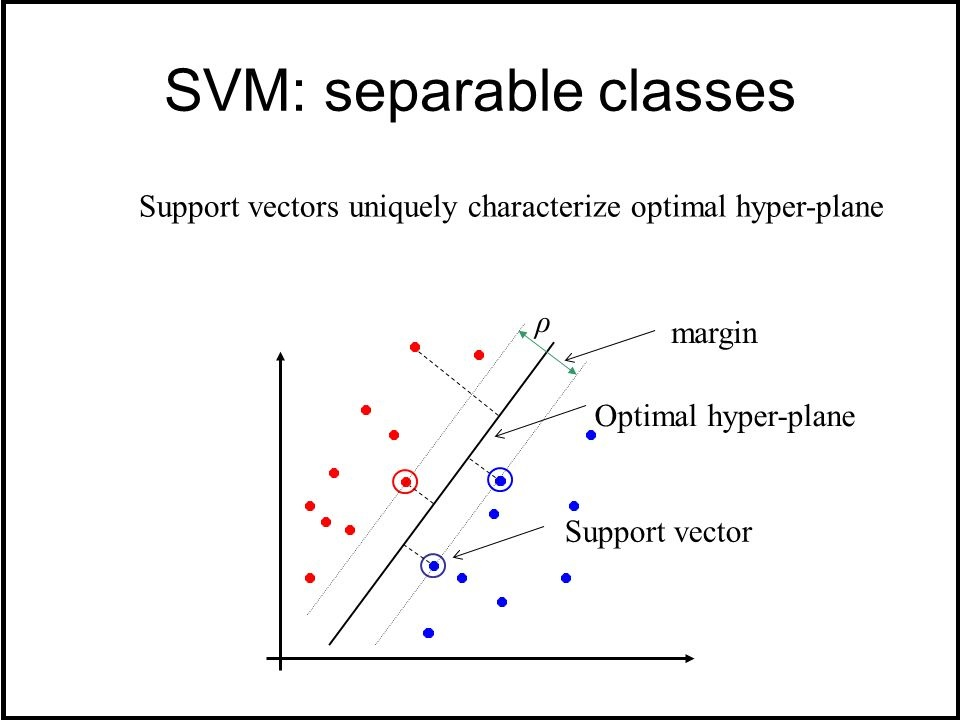
<br>
<p>For more reading click <a href="https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/">here</a>.<br><br>
    
<br>

In [66]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [67]:
# Predicting Test Set
y_pred = classifier.predict(xtest)

In [68]:
#Finding the Accuracy Score
acc = accuracy_score(ytest, y_pred)
acc

0.5887871342416797


<br>
<h4>Models implemented:</h4>

<ul>
    <li>Artificial Neural Network</li>
    <li>Random Forest Classifier</li>
    <li>Gradient Boosting</li>
    <li>Support Vector Machine</li>
    <li>Xg Boost</li>
</ul>

<center><h2><u>Conclusion</u><h2></center
    
 <ul>
    <li>XgBoost Algorithm performs the best and give the accuracy of 62 %</li>
    <li>We see that the ANN with no feature engineering performs far better than SVM, Random Forest with feature engineering</li>
    <li>Though we didnt get very high accuracy but this can help the banks in knowing whether the customer is risky or not.</li>
</ul>